# **Detectron-2 And Modules Setup for Visual elements detection**

# Inspecting GPU Details

In [ ]:
gpu_data = !nvidia-smi
gpu_data = '\n'.join(gpu_data)
print(gpu_data)

Fri Oct 22 16:29:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Detectron Installation

In [ ]:
!pip install pyyaml==5.1  #for yaml file parsing , used during config settings

!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html #Detectron2 with Pytorch-1.9v

#exit(0)  #restart the runtime

     |████████████████████████████████| 274 kB 12.9 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=723ea84d84042139a82e11db3af7868a97d066a8c171b90b43bcc46e51eadcee
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
     |████████████████████████████████| 6.9 MB 720 kB/s 
     |████████████████████████████████| 145 kB 12.5 MB/s 
     |████████████████████████████████| 130 kB 44.7 MB/s 
     |████████████████████████████████| 74 kB 3.2 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
     |████████████████████████████████| 743 kB 49.3 MB/s 
     |████████████████████████████████| 748 kB 45.9 MB/s 
     |█

#Enable Logging Support To Track The Progress and Intermediate Outputs

In [ ]:
import detectron2

from detectron2.utils.logger import setup_logger

setup_logger() #to enable meaningful logs collection at output while Training , Inferencing

<Logger detectron2 (DEBUG)>

# PyTorch Import

In [ ]:
import torch, torchvision

print(torch.__version__, torch.cuda.is_available()) #True : Indicates the code is running in a GPU-Based Environment

1.9.0+cu111 True


## Importing Stats and Detectron Submodules

In [ ]:
import numpy as np
import cv2          #explore images
import random       #randomly sample train data


In [ ]:
from detectron2.data.catalog import DatasetCatalog  #To Add TRAIN , VAL and TEST Data to the Dataset Registry

from detectron2.data import MetadataCatalog         #Additional Info About Datasets

from detectron2.utils.visualizer import Visualizer  #Visualize Images with Annotations

from detectron2.config import get_cfg               #Configuration sub-module for hyper-param settings

from detectron2 import model_zoo                    #provides variety of Image / object detection back-bone modules , state-of-art

from detectron2.engine import DefaultPredictor      #predictions/inferencing


In [ ]:
import os, json

from google.colab.patches import cv2_imshow         #To display Images

#Data Processing + Prep
# Mounting Google Drive File System For Storage Purpose




Follow The Steps Before Running The Successive Cell

i. visit this google drive [PlotQA_Data](https://drive.google.com/drive/folders/15bWhzXxAN4WsXn4p37t_GYABb1F52nQw) 

ii. Create A Shortcut and add it to My_Drive of your Google Drive Account

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [ ]:
!mkdir /root/Work
!mkdir /root/Work/Data

In [ ]:
! cp -r /content/gdrive/MyDrive/PlotQA /root/Work/Data/

In [ ]:
%cd /root/Work/Data/PlotQA/

/content/gdrive/.shortcut-targets-by-id/15bWhzXxAN4WsXn4p37t_GYABb1F52nQw/PlotQA


In [ ]:
!ls -ltr

total 6126788
dr-x------ 2 root root       4096 Jan 21  2020 annotations
-r-------- 1 root root  939498035 Jan 21  2020 VALIDATION.tar.gz
-r-------- 1 root root 4396185048 Jan 21  2020 TRAIN.tar.gz
-r-------- 1 root root  938142927 Jan 21  2020 TEST.tar.gz


In [ ]:
! tar -zxvf /root/Work/Data/PlotQA/VALIDATION.tar.gz -C /root/Work/Data/

Streaming output truncated to the last 5000 lines.
VALIDATION/png/200.png
VALIDATION/png/32797.png
VALIDATION/png/9525.png
VALIDATION/png/27535.png
VALIDATION/png/2324.png
VALIDATION/png/24199.png
VALIDATION/png/5976.png
VALIDATION/png/21791.png
VALIDATION/png/28934.png
VALIDATION/png/17043.png
VALIDATION/png/4326.png
VALIDATION/png/21901.png
VALIDATION/png/18113.png
VALIDATION/png/27814.png
VALIDATION/png/20542.png
VALIDATION/png/10557.png
VALIDATION/png/14240.png
VALIDATION/png/9661.png
VALIDATION/png/22899.png
VALIDATION/png/20728.png
VALIDATION/png/16651.png
VALIDATION/png/6325.png
VALIDATION/png/24477.png
VALIDATION/png/30715.png
VALIDATION/png/23348.png
VALIDATION/png/14643.png
VALIDATION/png/17510.png
VALIDATION/png/3392.png
VALIDATION/png/23341.png
VALIDATION/png/1946.png
VALIDATION/png/32301.png
VALIDATION/png/10984.png
VALIDATION/png/2385.png
VALIDATION/png/30516.png
VALIDATION/png/13308.png
VALIDATION/png/17750.png
VALIDATION/png/28523.png
VALIDATION/png/8054.png
VALIDATION/

In [ ]:
! tar -zxvf /root/Work/Data/PlotQA/TEST.tar.gz -C /root/Work/Data/

Streaming output truncated to the last 5000 lines.
TEST/png/9525.png
TEST/png/27535.png
TEST/png/2324.png
TEST/png/24199.png
TEST/png/5976.png
TEST/png/21791.png
TEST/png/28934.png
TEST/png/17043.png
TEST/png/4326.png
TEST/png/21901.png
TEST/png/18113.png
TEST/png/27814.png
TEST/png/20542.png
TEST/png/10557.png
TEST/png/14240.png
TEST/png/9661.png
TEST/png/22899.png
TEST/png/20728.png
TEST/png/16651.png
TEST/png/6325.png
TEST/png/24477.png
TEST/png/30715.png
TEST/png/23348.png
TEST/png/14643.png
TEST/png/17510.png
TEST/png/3392.png
TEST/png/23341.png
TEST/png/1946.png
TEST/png/32301.png
TEST/png/10984.png
TEST/png/2385.png
TEST/png/30516.png
TEST/png/13308.png
TEST/png/17750.png
TEST/png/28523.png
TEST/png/8054.png
TEST/png/25213.png
TEST/png/28977.png
TEST/png/29057.png
TEST/png/12706.png
TEST/png/12463.png
TEST/png/791.png
TEST/png/5352.png
TEST/png/20372.png
TEST/png/1647.png
TEST/png/19889.png
TEST/png/7593.png
TEST/png/24825.png
TEST/png/29991.png
TEST/png/789.png
TEST/png/13106.p

In [ ]:
! tar -zxvf /root/Work/Data/PlotQA/TRAIN.tar.gz -C /root/Work/Data/

Streaming output truncated to the last 5000 lines.
TRAIN/png/9849.png
TRAIN/png/86779.png
TRAIN/png/130417.png
TRAIN/png/28330.png
TRAIN/png/147364.png
TRAIN/png/99621.png
TRAIN/png/114983.png
TRAIN/png/148414.png
TRAIN/png/20406.png
TRAIN/png/7476.png
TRAIN/png/124346.png
TRAIN/png/85476.png
TRAIN/png/5869.png
TRAIN/png/75539.png
TRAIN/png/110602.png
TRAIN/png/94091.png
TRAIN/png/83063.png
TRAIN/png/109956.png
TRAIN/png/89203.png
TRAIN/png/13787.png
TRAIN/png/34382.png
TRAIN/png/52334.png
TRAIN/png/80455.png
TRAIN/png/37623.png
TRAIN/png/91555.png
TRAIN/png/129847.png
TRAIN/png/56897.png
TRAIN/png/53965.png
TRAIN/png/11852.png
TRAIN/png/93192.png
TRAIN/png/139961.png
TRAIN/png/92314.png
TRAIN/png/80399.png
TRAIN/png/93010.png
TRAIN/png/111057.png
TRAIN/png/118924.png
TRAIN/png/108779.png
TRAIN/png/150939.png
TRAIN/png/8298.png
TRAIN/png/17868.png
TRAIN/png/40880.png
TRAIN/png/83124.png
TRAIN/png/74083.png
TRAIN/png/18168.png
TRAIN/png/127764.png
TRAIN/png/146184.png
TRAIN/png/24241.pn

# Registering Our Custom Dataset [Images + Annotations] In the Catalog Registry

In [ ]:


from detectron2.data.datasets import register_coco_instances
#split-1
register_coco_instances("Train_A", {}, "/root/Work/Data/PlotQA/annotations/train_50k_annotations.json", "/root/Work/Data/TRAIN/png")
#implies that images from the specified path and the annotation from the specified path must be correlated and superimposed before training

#split-2
register_coco_instances("Train_B", {}, "/root/Work/Data/PlotQA/annotations/train_50k_1l_annotations.json", "/root/Work/Data/TRAIN/png")

#split-3
register_coco_instances("Train_C", {}, "/root/Work/Data/PlotQA/annotations/train_1l_end_annotations.json", "/root/Work/Data/TRAIN/png")

In [ ]:
#similar method for testing data as well
from detectron2.data.datasets import register_coco_instances
register_coco_instances("Test_A", {}, "/root/Work/Data/PlotQA/annotations/test_annotations.json", "/root/Work/Data/TEST/png")

In [ ]:
#Also for validation set

register_coco_instances("Val_A", {}, "/root/Work/Data/PlotQA/annotations/val_annotations.json", "/root/Work/Data/VALIDATION/png")

In [ ]:
#load one split of training data into memory and get its corresponding catalog

train_metadata = MetadataCatalog.get("Train_B")

dataset_dicts = DatasetCatalog.get("Train_B")

[09/19 06:04:31 d2.data.datasets.coco]: Loading /root/Work/Data/PlotQA/annotations/train_50k_1l_annotations.json takes 19.67 seconds.
[09/19 06:04:32 d2.data.datasets.coco]: Loaded 50000 images in COCO format from /root/Work/Data/PlotQA/annotations/train_50k_1l_annotations.json


# Visualizing A Sample From Training Data 

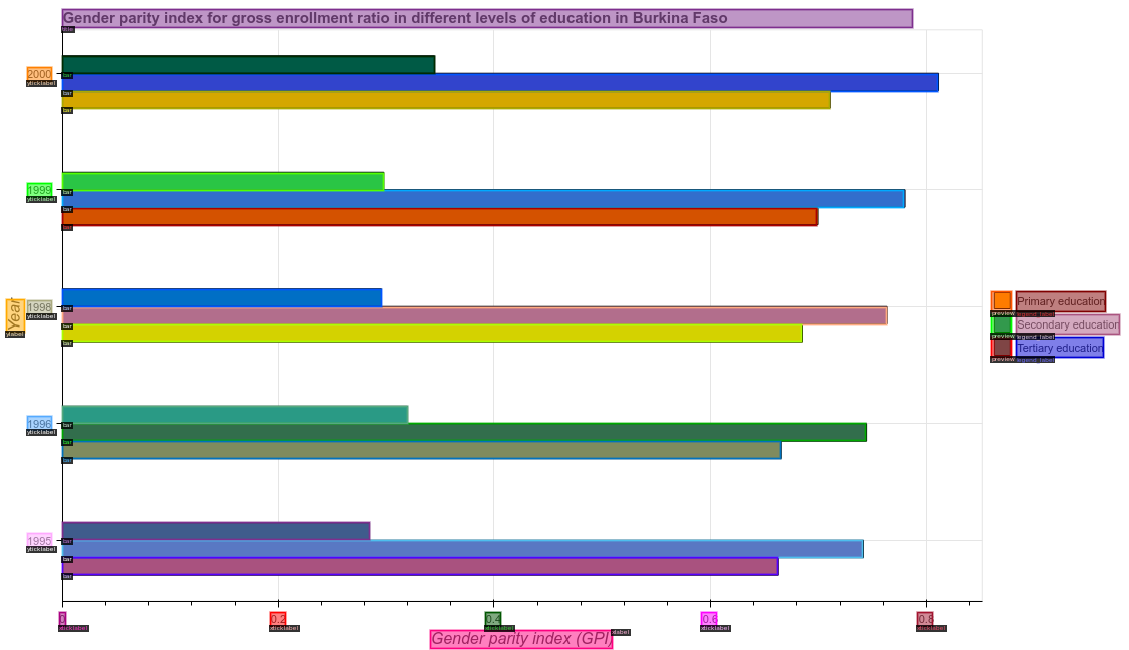

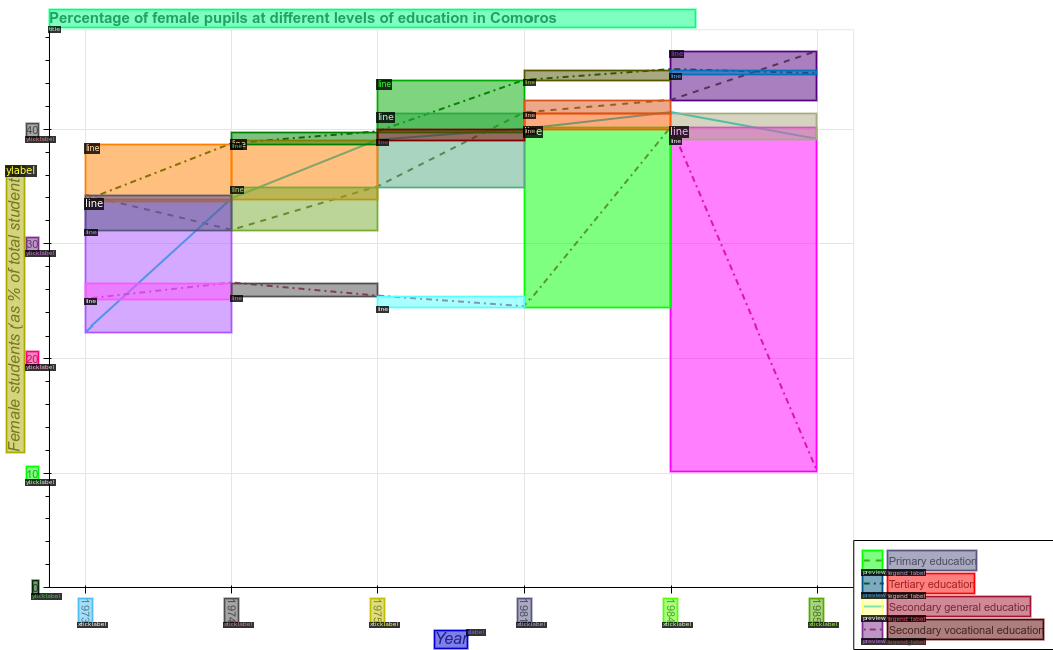

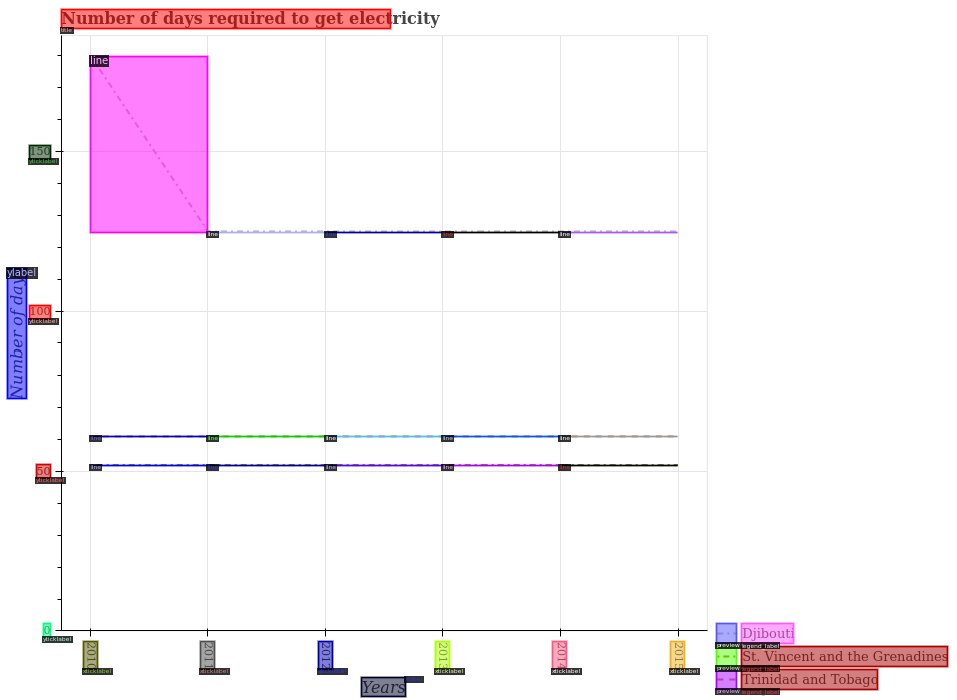

In [ ]:
#Now that we have registered the images and annotations in the catalog registry

#we can sample out few super-imposed samples to visualize the final train data

for sample in random.sample(dataset_dicts, 3):

    plot = cv2.imread(sample["file_name"])

    visualizer = Visualizer(plot[:, :, ::-1], metadata=train_metadata, scale=1)

    visual = visualizer.draw_dataset_dict(sample)
    
    cv2_imshow(visual.get_image()[:, :, ::-1])

    print("\n\n\n")

In [ ]:
'''
Backbone networks 
As we mentioned earlier, the first step is using a CNN pretrained for the task of classification (e.g. using ImageNet) and using the output of an intermediate layer.
This may sound really simple for people with a deep learning background, but it’s important to understand how and why it works, as well as visualize what the intermediate layer output looks like.


 There is no real consensus on which network architecture is best. The original Faster R-CNN used ZF and VGG pretrained on ImageNet
 but since then there have been lots of different networks with a varying number of weights. For example, MobileNet, a smaller and efficient 
 network architecture optimized for speed, has approximately 3.3M parameters, while ResNet-152 (yes, 152 layers), once the state of the art in the 
 ImageNet classification competition, has around 60M. Most recently, new architectures like DenseNet are both improving results while lowering the number of parameters
'''

'\nBackbone networks \nAs we mentioned earlier, the first step is using a CNN pretrained for the task of classification (e.g. using ImageNet) and using the output of an intermediate layer.\nThis may sound really simple for people with a deep learning background, but it’s important to understand how and why it works, as well as visualize what the intermediate layer output looks like.\n\n\n There is no real consensus on which network architecture is best. The original Faster R-CNN used ZF and VGG pretrained on ImageNet\n but since then there have been lots of different networks with a varying number of weights. For example, MobileNet, a smaller and efficient \n network architecture optimized for speed, has approximately 3.3M parameters, while ResNet-152 (yes, 152 layers), once the state of the art in the \n ImageNet classification competition, has around 60M. Most recently, new architectures like DenseNet are both improving results while lowering the number of parameters\n'

#Hyper-Parameter Setting

The Below Cell Is Under Test Currently , Don't Run It For Now

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):  #Inheriting and adding a function for validation purpose

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
config = get_cfg() #default config_object  of detectron2

'''
Now is the time for model selection

Model : faster-RCNN
Feature-extractor : Resnet-101 //must-try ResneXt-101 next-time

'''

config.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))

config.DATASETS.TRAIN = ('Train_A' ,'Train_B' , 'Train_C')

config.DATASETS.TEST = ()

config.NUM_GPUS = 1

config.DATALOADER.NUM_WORKERS = 4

config.MODEL.WEIGHTS = "/content/gdrive/MyDrive/2.3L/Train/model_final.pth"  # Let training initialize from model zoo

config.SOLVER.BASE_LR = 0.0002                                       #kept minimal , so that global optimum can be hit during gradient descent 

config.SOLVER.MAX_ITER = 31000                                         #Must Change for future training , similar to epoch

config.SOLVER.STEPS = (1100,)                             #Stages at which LR Reduction must occur

config.SOLVER.GAMMA = 0.1                                       #Reduction factor for LR

config.SOLVER.IMS_PER_BATCH = 1                                       #Images seen by GPU per sec

config.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512                     #Batch-size

config.MODEL.ROI_HEADS.NUM_CLASSES = 11                               #10 instances + 1 background

config.OUTPUT_DIR = './Output_2L_Cont'

#config.TEST.EVAL_PERIOD = 30000

config.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7

print(config.dump())




CUDNN_BENCHMARK: false
DATALOADER:
  ASPECT_RATIO_GROUPING: true
  FILTER_EMPTY_ANNOTATIONS: true
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: []
  PROPOSAL_FILES_TRAIN: []
  TEST: []
  TRAIN:
  - Train_A
  - Train_B
  - Train_C
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: false
    SIZE:
    - 0.9
    - 0.9
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN:
  - 640
  - 672
  - 704
  - 736
  - 768
  - 800
  MIN_SIZE_TRAIN_SAMPLING: choice
  RANDOM_FLIP: horizontal
MODEL:
  ANCHOR_GENERATOR:
    ANGLES:
    - - -90
      - 0
      - 90
    ASPECT_RATIOS:
    - - 0.5
      - 1.0
      - 2.0
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES:
    - - 32
    - - 64
    - - 128
    - - 256
    - - 512
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_re

#Finalizing the custom training configuration file

In [ ]:
with open("/content/gdrive/MyDrive/Config_Files/Plot_Ele_Detections_2L_cont.yaml" , 'w') as custom_config:

  custom_config.write(config.dump())

**Creating The Output Directory To Hold Dumps**



In [ ]:
%cd /root
print("*"*10 , "Before","*"*100)
!ls -ltr
print("*"*10 , "After","*"*100)
os.makedirs(config.OUTPUT_DIR, exist_ok=True)
!ls -ltr

/root
********** Before ****************************************************************************************************
total 4
drwxr-xr-x 3 root root 4096 Sep 19 06:00 Work
********** After ****************************************************************************************************
total 8
drwxr-xr-x 3 root root 4096 Sep 19 06:00 Work
drwxr-xr-x 2 root root 4096 Sep 19 06:07 Output_2L_Cont


#Freeing Pre-Cached Tensors and Unused objects 

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
from detectron2.engine import DefaultTrainer

trainer = DefaultTrainer(config) 
trainer.resume_or_load(resume=False)
trainer.train()

[09/19 06:07:57 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

#**Inferencing On Test Data**

In [ ]:
#config.MODEL.WEIGHTS = os.path.join(config.OUTPUT_DIR, "model_final.pth")

config.DATASETS.TEST = ("Test_A",)
config.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(config)
test_metadata = MetadataCatalog.get("Test_A")
from detectron2.utils.visualizer import ColorMode
dataset_dicts = DatasetCatalog.get("Test_A")



[09/19 06:10:46 d2.data.datasets.coco]: Loading /root/Work/Data/PlotQA/annotations/test_annotations.json takes 15.57 seconds.
[09/19 06:10:47 d2.data.datasets.coco]: Loaded 33650 images in COCO format from /root/Work/Data/PlotQA/annotations/test_annotations.json


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


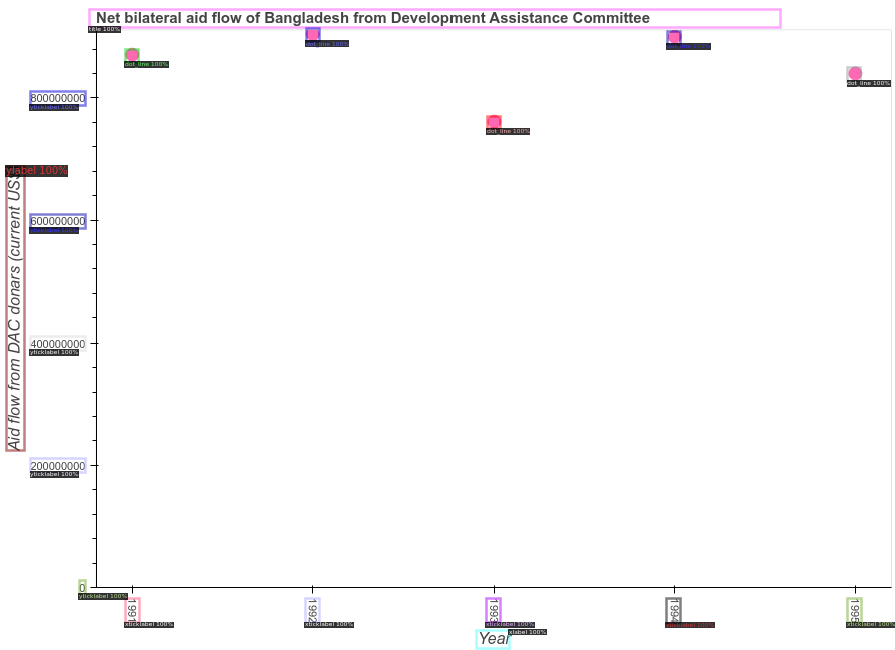

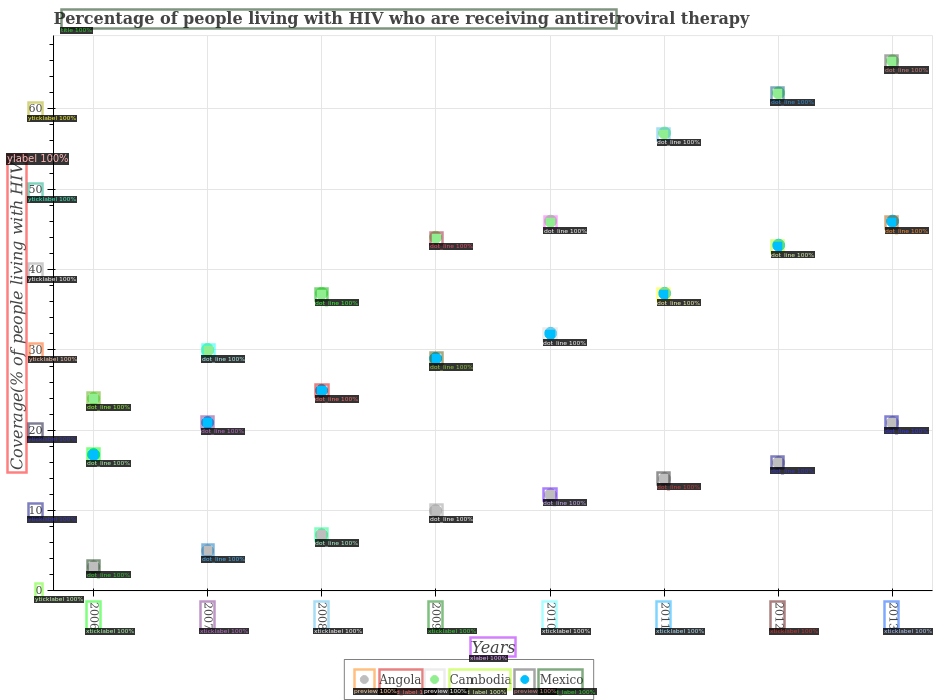

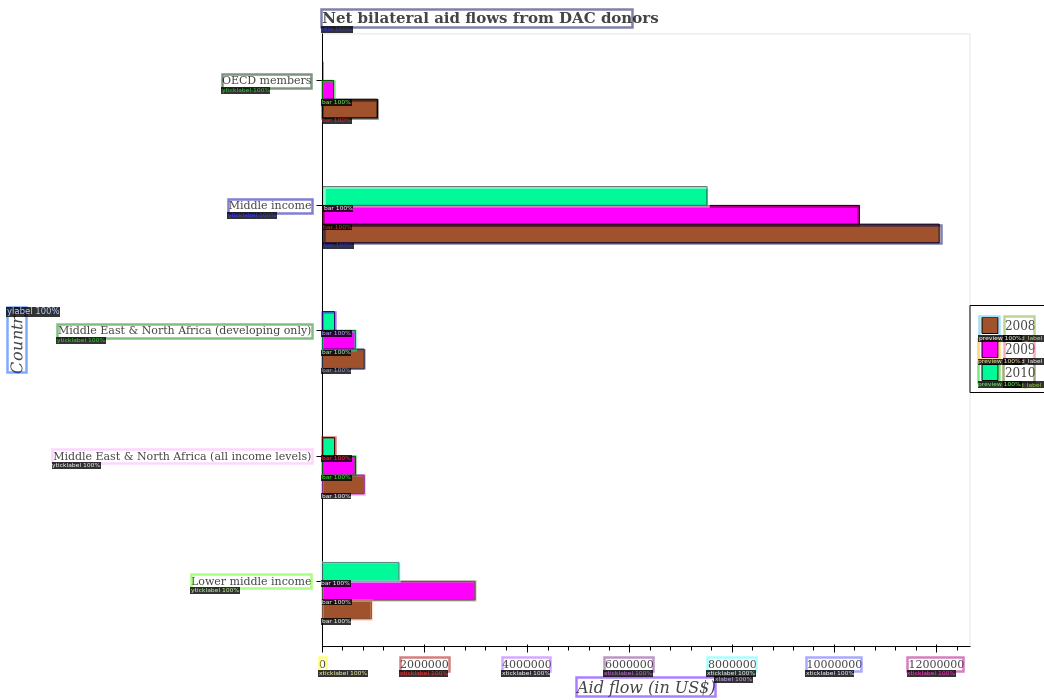

In [ ]:
config.DATASETS.TEST = ("Test_A",)

config.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model

predictor = DefaultPredictor(config)

test_metadata = MetadataCatalog.get("Test_A")

from detectron2.utils.visualizer import ColorMode

dataset_dicts = DatasetCatalog.get("Test_A")


for d in random.sample(dataset_dicts, 3):    

    im = cv2.imread(d["file_name"])

    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format

    v = Visualizer(im[:, :, ::-1],
                   metadata=test_metadata, 
                   scale=1, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )

    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
    cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
!cp -r /root/Output_2L_Cont/ '/content/gdrive/MyDrive/2.3L/Train'

In [ ]:
!mkdir /root/Result_test

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("Test_A" , output_dir="/root/Result_test")

val_loader = build_detection_test_loader(config, "Test_A")

t = (inference_on_dataset(trainer.model, val_loader, evaluator ))


# another equivalent way to evaluate the model is to use `trainer.test`

In [ ]:
!cp -r /root/Result_test/ '/content/gdrive/MyDrive/AP50/Test' 